# **Data Mining & Machine Learning 2022 Project**
## Group: UNIL_OMEGA 
### *Detecting the difficulty level of French texts* 
##### [to go back to the GitHub repository](https://github.com/mlstudent12/DMML2022_Omega)

<!--TABLE OF CONTENTS --> 
<details>
  <summary>📂Table of contents </summary>
  <ol>
    </li>
    <li><a href="#packages-import">Packages import</a></li>
    <li><a href="#loading-data">Loading the data</a></li>
    <li><a href="#look-at-data">Let's have a look at the data</a></li>
    <li><a href="#preparing-data">Preparing the data</a></li>
    <li><a href="#methods">Methods to generate and evaluate the models</a></li>
    <li><a href="#lr">Logistic Regression (without data claeaning)</a></li>
    <li><a href="#KNN">KNN (without data cleaning)</a></li>
    <li><a href="#tree">Decision Tree classifier (without data cleaning)</a></li>
    <li><a href="#rf">Random Forest Classifier (without data cleaning)</
  </ol>
</details>


## 1. Packages import


In [21]:
# imporant packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import string

# vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels

# pipeline
from sklearn.pipeline import Pipeline

# train and test split
from sklearn.model_selection import train_test_split

## 2. Loading the data

In [22]:
# loading the data
df_training = pd.read_csv('https://raw.githubusercontent.com/mlstudent12/DMML2022_Omega/main/data/training_data.csv', index_col=0)
df_pred = pd.read_csv('https://raw.githubusercontent.com/mlstudent12/DMML2022_Omega/main/data/unlabelled_test_data.csv', index_col=0)

## 3. Let's have a look at the data

In [23]:
# first 5 rows of the training data
df_training.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [24]:
# training data columns information
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    4800 non-null   object
 1   difficulty  4800 non-null   object
dtypes: object(2)
memory usage: 112.5+ KB


In [25]:
# first 5 rows of the unlabelled data
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


In [26]:
# unlabelled data columns information
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1200 non-null   object
dtypes: object(1)
memory usage: 18.8+ KB


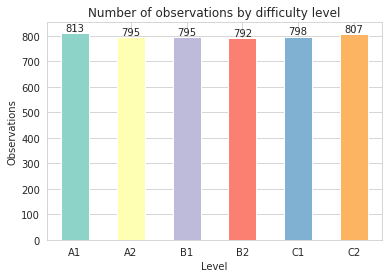

In [27]:
# number of obeservations by difficulty level

colors = plt.cm.get_cmap('Set3')
difficulty_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
counts = df_training.difficulty.value_counts()
counts = counts.reindex(difficulty_levels)
counts.plot(kind='bar', color=colors(range(len(difficulty_levels))))

for i, count in enumerate(counts):
    plt.annotate(str(count), (i, count), xytext=(0, 0), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=0)

plt.xlabel('Level')
plt.ylabel('Observations')
plt.title('Number of observations by difficulty level')

plt.show() 

In [28]:
# baseline
value_count = df_training['difficulty'].value_counts()
baseline = max(value_count) / len(df_training['difficulty'])
print('Baseline = ' + str(round(baseline,4)))

Baseline = 0.1694


## 4. Preparing the data

In [29]:
# split the training data into a train and test set using specific parameters 
X = df_training['sentence']  # X contains the features we want to analyze 
y = df_training['difficulty']  # y is the labels we want
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# set a Tfidf vectorizer
tfidf_vector = TfidfVectorizer(ngram_range=(1, 1))

## 5. Methods to generate and evaluate the models 

In [31]:
# method to create a pipeline using Tfidf vectoriser and a classifier
def pipeline(classifier):
    pipeline = Pipeline([('vectorizer', tfidf_vector), ('classifier', classifier)])
    return pipeline

In [32]:
# method to fit the models on the training set and make predictions
def fit_and_predict(pipeline): 
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  return y_pred

In [33]:
# method to evaluate the models (accuracy, precision, recall, f1-score, confusion matrix)

def evaluation(y_test, y_pred):
    
    # compute and print the evaluation scores on the test set
    print('Accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision = {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Recall = {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('F1-score = {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

    # define the labels, plot and display the confusion matrix
    labels = list(unique_labels(y_test, y_pred))
    cfm = confusion_matrix(y_test, y_pred, labels = labels)
    fig, ax = plt.subplots(figsize=(6,6))
    plt.title('Confusion matrix of the model')
    sns.heatmap(cfm, annot=True, fmt='4g', cmap='PuRd', xticklabels=labels, yticklabels=labels)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

## 6. Logistic Regression (without data cleaining)

Accuracy = 0.4667
Precision = 0.4656
Recall = 0.4667
F1-score = 0.4640


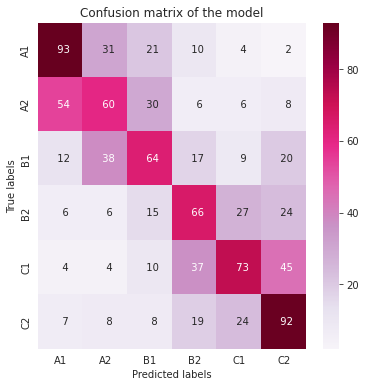

In [34]:
# define classifier
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300)

# create pipeline
pipeline_lr = pipeline(lr)

# fit model on training set and make predictions
y_pred_lr = fit_and_predict(pipeline_lr)

# evaluate the model
lr_evaluation = evaluation(y_test, y_pred_lr)

## 7. KNN (without data cleaining)

#### KNN basic

Accuracy = 0.3187
Precision = 0.4030
Recall = 0.3187
F1-score = 0.3022


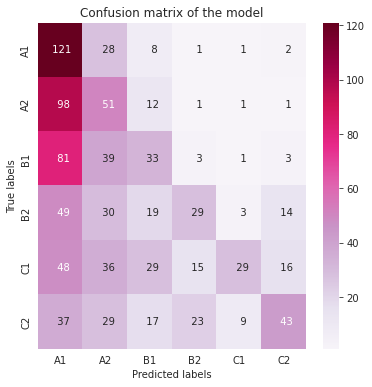

In [35]:
# define classifier
knn = KNeighborsClassifier()

# create pipeline
pipeline_knn = pipeline(knn)

# fit model on training set and make predictions
y_pred_knn = fit_and_predict(pipeline_knn)

# evaluate the model
knn_evaluation = evaluation(y_test, y_pred_knn)

#### KNN improved by tuning the hyperparameters (`n_neighbors`,   `p`, `weights`)

Accuracy = 0.3677
Precision = 0.4242
Recall = 0.3677
F1-score = 0.3571


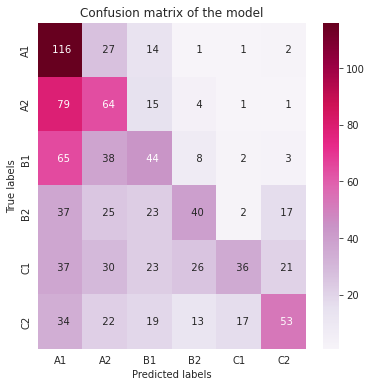

Hyperparameters:  {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [36]:
# find the best hyperparameters
grid = {'n_neighbors':np.arange(1,100), 'p':np.arange(1,3), 'weights':['uniform','distance']}

# define classifier
knn_cv = GridSearchCV(knn, grid, cv=10)

# create pipeline
pipeline_knn_cv = pipeline(knn_cv)

# fit model on training set and make predictions
y_pred_knn_cv = fit_and_predict(pipeline_knn_cv)

# evaluate the model
knn_cv_evaluation = evaluation(y_test, y_pred_knn_cv)

# print the hyperparameters
print('Hyperparameters: ', knn_cv.best_params_)

## 8. Decision Tree Classifier (without data cleaning)

#### Decision Tree Classifier basic

Accuracy = 0.3010
Precision = 0.3028
Recall = 0.3010
F1-score = 0.2992


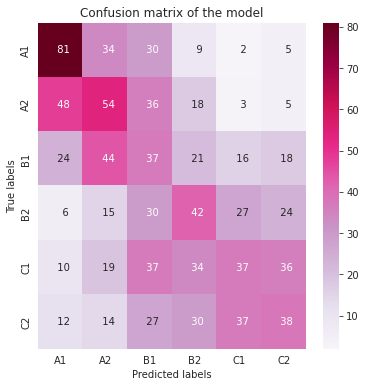

In [37]:
# define classifier
tree = DecisionTreeClassifier()

# create pipeline
pipeline_tree = pipeline(tree)

# fit model on training set and make predictions
y_pred_tree = fit_and_predict(pipeline_tree)

# evaluate the model
tree_evaluation = evaluation(y_test, y_pred_tree)

#### Decision Tree Classifier improved by tuning the hyperparameters (`max_depth`)

Accuracy = 0.3073
Precision = 0.3118
Recall = 0.3073
F1-score = 0.3054


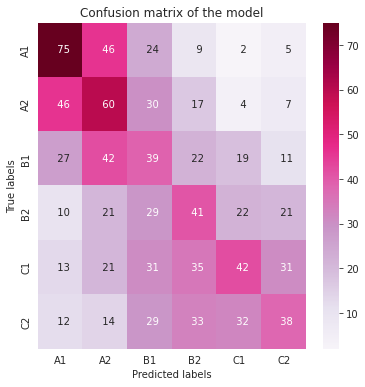

Hyperparameters:  {'max_depth': 77}


In [38]:
# find the best hyperparameters
grid = {'max_depth':np.arange(1,100)}

# define classifier
tree_cv = GridSearchCV(tree, grid, cv=10)

# create pipeline
pipeline_tree_cv = pipeline(tree_cv)

# fit model on training set and make predictions
y_pred_tree_cv = fit_and_predict(pipeline_tree_cv)

# evaluate the model
tree_cv_evaluation = evaluation(y_test, y_pred_tree_cv)

# print the hyperparameters
print('Hyperparameters: ', tree_cv.best_params_)

## 9. Random Forest Classifier (without data cleaning)

Accuracy = 0.4146
Precision = 0.4216
Recall = 0.4146
F1-score = 0.3995


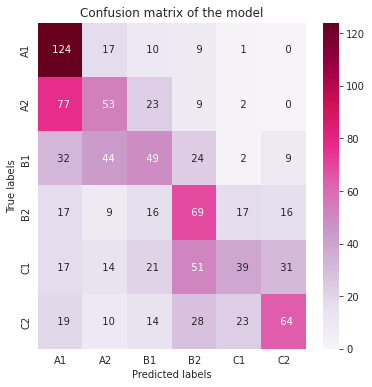

In [39]:
# define classifier
rf = RandomForestClassifier()

# create pipeline
pipeline_rf = pipeline(rf)

# fit model on training set and make predictions
y_pred_rf= fit_and_predict(pipeline_rf)

# evaluate the model
rf_evaluation = evaluation(y_test, y_pred_rf)